# Menentukan Pertayaan Bisnis

1. Apakah cuaca dapat mempengaruhi penyewa sepeda di setiap jam nya?

2. Hubungan musim dengan penyewa sepeda pada setiap jam nya?

3. Apakah ada kenaikan penyewaan sepeda dalam setiap jamnya pada setiap bulan?

4. Dari tahun 2011 sampai 2012, apakah ada kenaikan dalam user menyewa sepeda?

# Library yang dibutuhkan

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wragling


In [226]:
#Gathering Data

data_day = pd.read_csv("../submission_dicoding/data/day.csv")
data_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [227]:
data_hour = pd.read_csv("../submission_dicoding/data/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [228]:
bike_combine = data_day.merge(data_hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
bike_combine.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [229]:
bike_combine.loc[bike_combine["dteday"].isnull()]

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly


In [230]:
#Checking Data

data_day.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [231]:
#Checking Data

data_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [232]:
#Checking Data

bike_combine.isnull().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

In [233]:
print("Jumlah Duplikasi: ", bike_combine.duplicated().sum())
bike_combine.describe()

Jumlah Duplikasi:  0


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Exploratory Data Analysis (EDA) 

In [234]:
#mengelompokkan data berdasarkan cuaca (weathersit_daily)

bike_combine.groupby(by="weathersit_daily").agg({
    "workingday_daily": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "temp_daily": ["max", "min", "mean", lambda x: x.max() - x.min()]  
}).sort_values(by=("workingday_daily", "count"), ascending=False) 

workingday_daily temp_daily                              
                            count        max      min      mean <lambda_0>
weathersit_daily                                                          
1                           11040   0.861667  0.05913  0.512989   0.802537
2                            5871   0.815000  0.10750  0.471749   0.707500
3                             468   0.633913  0.21750  0.436111   0.416413

In [235]:
#mengelompokkan data berdasarkan cuaca (weathersit_hourly)

bike_combine.groupby(by="weathersit_hourly").agg({
    "workingday_hourly": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "temp_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  
}).sort_values(by=("workingday_hourly", "count"), ascending=False) 

workingday_hourly temp_hourly                           
                              count         max   min      mean <lambda_0>
weathersit_hourly                                                         
1                             11413        1.00  0.02  0.511054       0.98
2                              4544        0.96  0.02  0.474445       0.94
3                              1419        0.92  0.08  0.456688       0.84
4                                 3        0.22  0.14  0.186667       0.08

In [236]:
bike_combine.groupby(by="season_hourly").mnth_hourly.nunique()

season_hourly
1    4
2    4
3    4
4    4
Name: mnth_hourly, dtype: int64

In [237]:
bike_combine.groupby(by="season_hourly").instant_hourly.nunique()

season_hourly
1    4242
2    4409
3    4496
4    4232
Name: instant_hourly, dtype: int64

In [238]:
bike_combine.groupby(by="season_hourly").cnt_hourly.nunique()

season_hourly
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

In [239]:
bike_combine.groupby(by="season_hourly").cnt_hourly.nunique()

season_hourly
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

In [240]:
bike_combine.groupby(by="weathersit_hourly").cnt_hourly.nunique()

weathersit_hourly
1    848
2    649
3    368
4      3
Name: cnt_hourly, dtype: int64

In [241]:
bike_combine.groupby(by="weathersit_hourly").cnt_hourly.nunique()

weathersit_hourly
1    848
2    649
3    368
4      3
Name: cnt_hourly, dtype: int64

In [242]:
numerical_columns = ["holiday_hourly" 
 ,"weekday_hourly","workingday_hourly","weathersit_hourly","temp_hourly","atemp_hourly","season_hourly", "windspeed_hourly",  "cnt_hourly"]
correlation = bike_combine[numerical_columns].corr()
print(correlation)

                   holiday_hourly  weekday_hourly  workingday_hourly  \
holiday_hourly           1.000000       -0.102088          -0.252471   
weekday_hourly          -0.102088        1.000000           0.035955   
workingday_hourly       -0.252471        0.035955           1.000000   
weathersit_hourly       -0.017036        0.003311           0.044672   
temp_hourly             -0.027340       -0.001795           0.055390   
atemp_hourly            -0.030973       -0.008821           0.054667   
season_hourly           -0.009585       -0.002335           0.013743   
windspeed_hourly         0.003988        0.011502          -0.011830   
cnt_hourly              -0.030927        0.026900           0.030284   

                   weathersit_hourly  temp_hourly  atemp_hourly  \
holiday_hourly             -0.017036    -0.027340     -0.030973   
weekday_hourly              0.003311    -0.001795     -0.008821   
workingday_hourly           0.044672     0.055390      0.054667   
weathersit_

# Visualization & Explanatory Analysis

In [243]:
# Menghitung rata-rata jumlah sewa jam berdasarkan weather
weather_data = bike_combine.groupby('weathersit_hourly')['cnt_hourly'].mean().reset_index()

In [244]:
# Memberi nama musim
weather_data['weather_name'] = ['Clear', 'Mist + Clody', 'Light Snow', 'Heavy Rain']

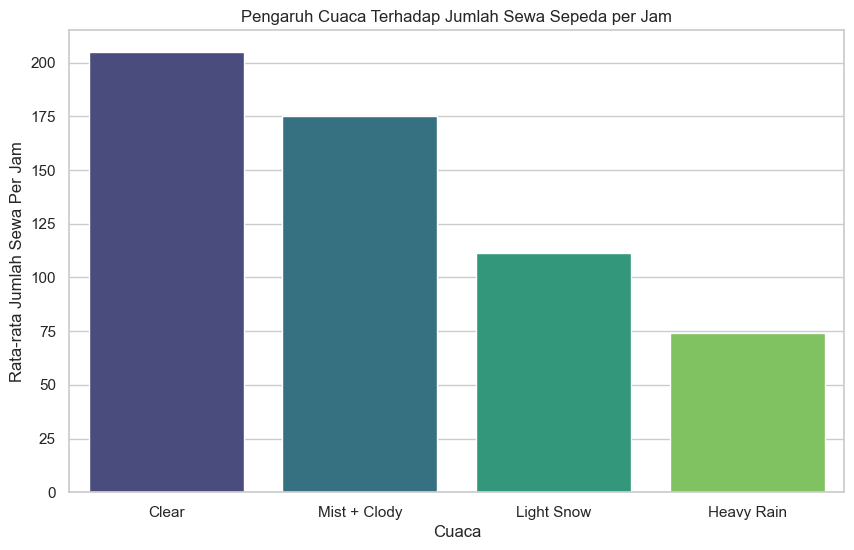

In [245]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_name', y='cnt_hourly', data=weather_data, palette="viridis")

plt.title('Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda per Jam')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa Per Jam')

plt.show()


In [246]:
# Menghitung rata-rata jumlah sewa jam berdasarkan season
season_data = bike_combine.groupby('season_hourly')['cnt_hourly'].mean().reset_index()
season_data



,season_hourly,cnt_hourly
0,1,111.114569
1,2,208.344069
2,3,236.016237
3,4,198.868856


In [247]:
season_data['season_name'] = ['Springer','Summer','Fall', 'Winter']

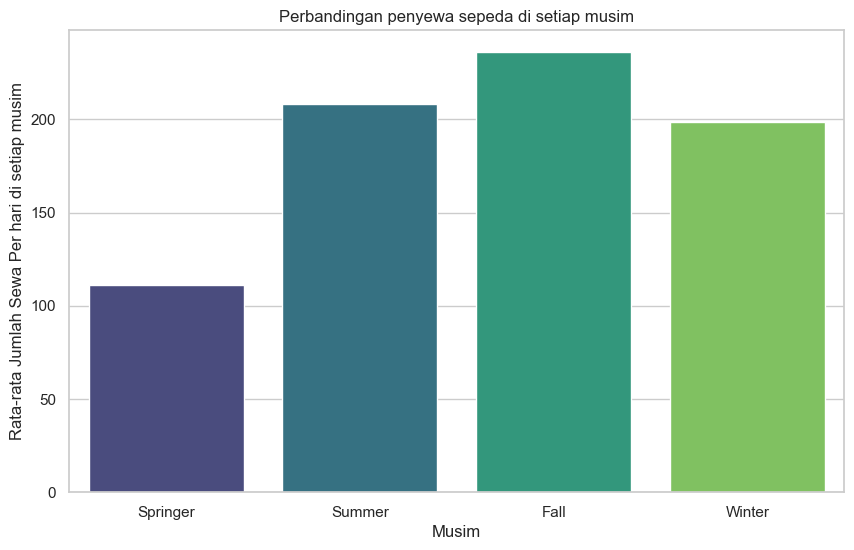

In [248]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt_hourly', data=season_data, palette="viridis")

plt.title('Perbandingan penyewa sepeda di setiap musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Per hari di setiap musim')

plt.show()

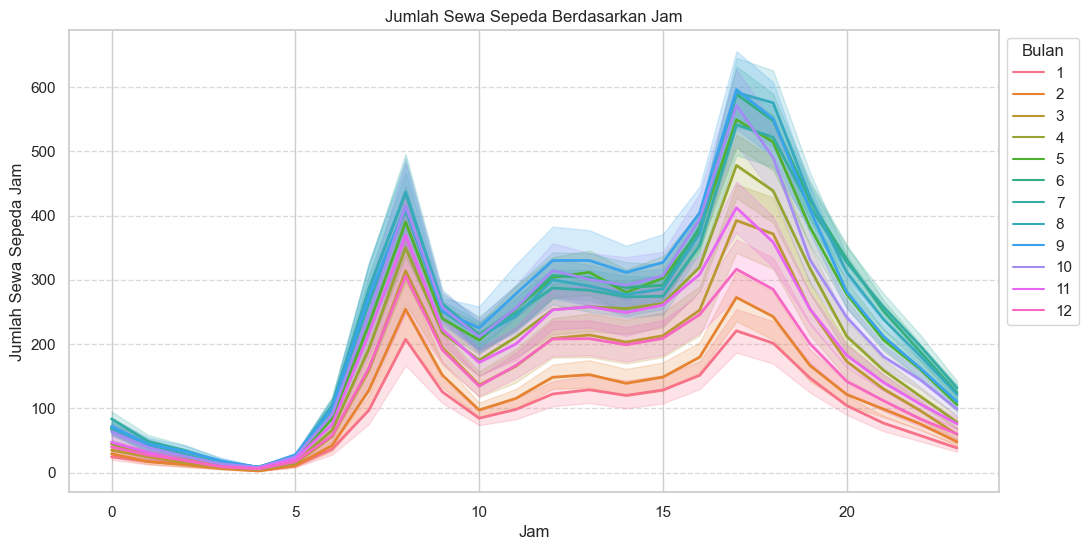

In [249]:
color_palette = sns.color_palette("husl", 12) 

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(x='hr', y="cnt_hourly", data=bike_combine, hue="mnth_daily", palette=color_palette, linewidth=2)

# legend
plt.legend(title="Bulan", loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Jumlah Sewa Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Jam")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [250]:
ddate = bike_combine['dteday']
ddate

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

C:\Users\yodif\AppData\Local\Temp\ipykernel_17088\1030171691.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x='dteday', y="cnt_hourly", data=bike_combine,  alpha=0.7, cmap='viridis')


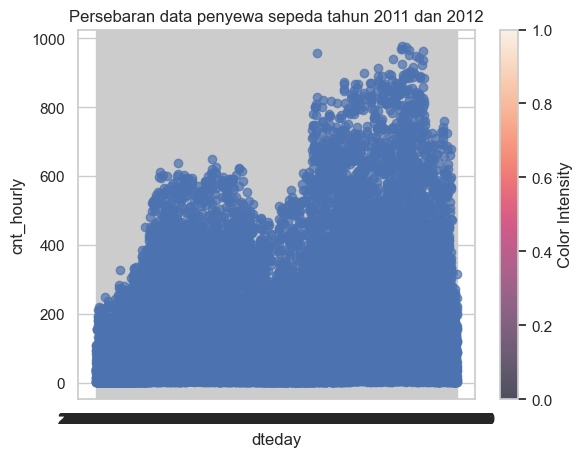

In [251]:
plt.scatter(x='dteday', y="cnt_hourly", data=bike_combine,  alpha=0.7, cmap='viridis')

# Add title and axis labels
plt.title("Persebaran data penyewa sepeda tahun 2011 dan 2012")
plt.xlabel("dteday")
plt.ylabel("cnt_hourly")
 
# Display color intensity scale
plt.colorbar(label='Color Intensity')
 
# Show the plot
plt.show()

# Conclusion

## Pertanyaan Pertama : Apakah cuaca dapat mempengaruhi penyewa sepeda di setiap jam nya?

1. Cuaca Terang:
Penyewa sepeda paling banyak terjadi saat cuaca terang.
Cuaca terang sangat mendukung aktivitas luar ruangan, termasuk bersepeda.

2. Cuaca Berawan:
Cuaca berawan juga menjadi kondisi yang disukai oleh penyewa sepeda.
Meskipun tidak sebanyak cuaca terang, cuaca berawan tetap menarik minat penyewa.

3. Cuaca Mendung dengan Hujan Ringan:
Cuaca mendung dengan hujan ringan memiliki jumlah penyewa yang cukup, menunjukkan bahwa sebagian penyewa masih tertarik meskipun ada potensi hujan.

4. Cuaca Hujan Berat:
Cuaca hujan berat menunjukkan jumlah penyewa yang paling rendah.
Ketersediaan sepeda dapat diperkirakan akan lebih banyak yang tersedia karena permintaan yang rendah pada kondisi cuaca ini.



- Rekomendasi Bisnis:

Bisnis sepeda dapat menyesuaikan stok dan pelayanan mereka berdasarkan prakiraan cuaca untuk memaksimalkan pendapatan.
Pemasaran yang lebih intens dapat dilakukan saat cuaca terang dan berawan, sementara penawaran spesial atau promosi dapat diterapkan saat cuaca mendung dengan hujan ringan.
Peluang Peningkatan Layanan:

- Menyediakan informasi cuaca secara real-time pada platform penyewaan sepeda dapat membantu pelanggan membuat keputusan yang lebih baik berdasarkan kondisi aktual.

## Pertanyaan Kedua : Apakah Musim berpengaruh pada penyewaan sepeda di setiap jam nya?

1. Musim Fall:
Penyewa sepeda paling banyak terjadi selama musim Fall.
Fall mungkin menjadi musim yang sangat diantisipasi oleh penyewa sepeda, mungkin karena cuaca yang nyaman dan pemandangan yang menarik.

2. Musim Summer:
Musim Summer menyusul sebagai musim dengan jumlah penyewa sepeda tertinggi setelah Fall.
Cuaca hangat dan kondisi yang mendukung aktivitas luar ruangan membuat Summer menjadi pilihan yang populer.

3. Musim Winter:
Musim Winter menunjukkan minat penyewa yang lebih tinggi dibandingkan musim Springer, tetapi masih lebih rendah dibandingkan dengan Fall dan Summer.
Peningkatan minat mungkin terkait dengan aktivitas khusus seperti bersepeda salju atau kegiatan musim dingin lainnya.

4. Musim Springer:
Musim Springer menunjukkan jumlah penyewa yang paling rendah.
Cuaca yang mungkin belum sepenuhnya stabil atau kurangnya daya tarik khusus pada musim ini dapat mempengaruhi minat penyewa.



- Strategi Bisnis Berbasis Musim:

Fokuskan upaya pemasaran dan promosi intensif pada musim Fall dan Summer untuk memaksimalkan pendapatan.
Pertimbangkan penyesuaian stok dan strategi penawaran khusus selama musim Winter untuk menarik penyewa yang mencari pengalaman musim dingin.

- Analisis Pengaruh Cuaca:

Kesimpulan ini menunjukkan bahwa cuaca dan suhu mungkin memainkan peran penting dalam keputusan penyewaan sepeda.
Pemantauan tren cuaca dan penyesuaian strategi operasional dapat menjadi kunci untuk mengoptimalkan kinerja bisnis.

## Pertanyaan Ketiga : Apakah ada kenaikan penyewaan sepeda dalam setiap jamnya pada setiap bulan?

1. Puncak Penyewaan Sore Hari:
Penyewa sepeda paling banyak terjadi pada rentang waktu sore antara jam 5 - 6.
Puncak ini mungkin disebabkan oleh banyaknya orang yang menggunakan sepeda setelah bekerja atau sekolah.

2. Pagi Hari (Jam 6 - 8):
Meskipun jumlah penyewa pada pagi hari (jam 6 - 8) tidak sebanyak sore hari, tetapi masih menunjukkan minat yang cukup tinggi.
Pagi hari dapat menjadi waktu yang diminati untuk kegiatan rekreasi atau transportasi menuju tempat kerja atau sekolah.

3. Malam Hari (Jam 20 - 22):
Meskipun diakhiri oleh malam hari (jam 20 - 22), penyewaan sepeda masih menunjukkan tingkat minat yang relatif tinggi di jam-jam tersebut.
Malam hari mungkin digunakan untuk bersepeda setelah jam kerja atau kegiatan malam lainnya.


- Strategi Operasional:
Fokuskan pada ketersediaan sepeda dan pelayanan pelanggan yang optimal pada jam-jam puncak, terutama pada sore hari.
Evaluasi kebutuhan stok dan pelayanan pada pagi hari untuk memastikan kesiapan dalam menyambut penyewa yang aktif di waktu tersebut.

- Penyesuaian Penawaran atau Diskon:
Pertimbangkan penawaran khusus atau diskon pada jam-jam tertentu untuk meningkatkan minat penyewa di luar jam puncak.
Misalnya, diskon untuk penyewaan di pagi hari atau malam hari untuk merangsang aktivitas penyewaan.

# Dari tahun 2011 sampai 2012, apakah ada kenaikan dalam user menyewa sepeda berdasarkan jam?

- Tren Kenaikan Total Penyewa:
Dari analisis data 2011-2012, terlihat tren kenaikan jumlah penyewa sepeda secara keseluruhan.

- Peningkatan Signifikan pada Oktober 2012:
Bulan Oktober 2012 menonjol sebagai periode dengan peningkatan penyewa yang paling signifikan.
Penyebab kenaikan ini perlu dianalisis lebih lanjut, mungkin terkait dengan peristiwa khusus atau strategi pemasaran yang berhasil.